# Build initial catalog

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('src/')

import notebook_functions

import pygmt
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
from notebook_functions import plotScatterMapDepthAlongStrike,formatWS2021,plotScatterMap, calcRadius, haversine
from matplotlib import pyplot as plt
import warnings

# Load DDiff NCA catalog

https://www.ldeo.columbia.edu/~felixw/NCAeqDD.v202112.1.gz


In [2]:
# These are events that were part of RES in WS21 but were not in our study range. 
# They ended up being parrt of RES in our study range, so we add them in in the beginning.

missing_ev = ['21122537',
 '211046',
 '147401',
 '72295541',
 '71487996',
 '71465205',
 '71960585',
 '115453',
 '21122102',
 '26921',
 '21214797',
 '21528560',
 '30066883',
 '21448912',
 '21008295',
 '509608',
 '71350966',
 '71918951',
 '200745',
 '90374',
 '21140639',
 '21379455',
 '67404',
 '71376516',
 '497415',
 '30230880',
 '21311302',
 '71727200',
 '26215',
 '72295611',
 '147149',
 '21486076',
 '21233555',
 '238452',
 '71919501',
 '489640',
 '200082',
 '536637',
 '40207421',
 '233583',
 '71205310',
 '51182996',
 '71444040',
 '30033300',
 '40231851',
 '51210102',
 '21306836',
 '21513871',
 '72002716',
 '30032522',
 '30033308',
 '238706',
 '30054227',
 '21542834']

36.46427 -121.037154


/Users/theresasawi/opt/anaconda3/envs/seismo2/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/theresasawi/opt/anaconda3/envs/seismo2/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


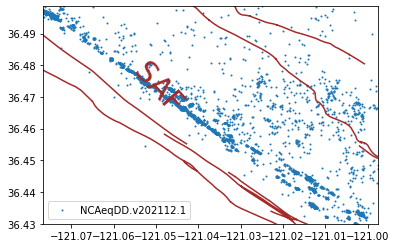

In [3]:
cat_NCADD = pd.read_csv('../data/raw/NCAeqDD.v202112.1.txt',delim_whitespace=True)

plt.scatter(cat_NCADD.LON,cat_NCADD.LAT,s=1,label='NCAeqDD.v202112.1')
ax1 = plt.gca()
ax1.legend()
maxlat,maxlon = 36.498571999999996, -120.997648
minlat,minlon = 36.429968, -121.07666


fault_df = pd.read_csv('../data/creep/felix_CA_Qfaults.csv',header=None,delim_whitespace=True,names=['lat','lon','ID'])
ax1.plot(fault_df.lon,fault_df.lat,color='brown')
ax1.text(-121.0566,36.465,'SAF',rotation=-48,fontsize=30, color='brown')

plt.xlim(minlon,maxlon)
plt.ylim(minlat,maxlat)

print(np.mean([minlat,maxlat]), np.mean([minlon,maxlon]))



# plt.savefig('../reports/figures/NCAeqDD.v202112.1_Qfault.png')

# Are missing event ids in original full catalog? where are they?

In [4]:
cat_NCADD_missing = cat_NCADD[cat_NCADD.ID.isin(missing_ev)]
print(len(cat_NCADD_missing))

54


In [5]:
# plt.scatter(cat_NCADD_5km_2019.long,cat_NCADD_5km_2019.lat,s=1,label='NCAeqDD.v202112.1')
# plt.scatter(cat_NCADD_missing.LON,cat_NCADD_missing.LAT,s=10,label='NCAeqDD.v202112.1')
# plt.xlim(minlon,maxlon)
# plt.ylim(minlat,maxlat)


## Define center lat lon

In [6]:
#center lat lon
lat0, lon0 = 36.465,-121.037

#trim large catalog
buff = .5

#define radius from center latlon
radius_km = 5



# Broadly trim to region

In [7]:
cat_NCADD_trim = cat_NCADD[cat_NCADD.LAT<lat0+buff]
cat_NCADD_trim = cat_NCADD_trim[cat_NCADD_trim.LAT>lat0-buff]
cat_NCADD_trim = cat_NCADD_trim[cat_NCADD_trim.LON<lon0+buff]
cat_NCADD_trim = cat_NCADD_trim[cat_NCADD_trim.LON>lon0-buff]

In [8]:
cat_NCADD_missing_trim = cat_NCADD_trim[cat_NCADD_trim.ID.isin(missing_ev)]
print(len(cat_NCADD_missing_trim))

54


# Finely trim : with 5km of centroid

In [9]:
cat_NCADD_5km = pd.DataFrame()

for i, row in cat_NCADD_trim.iterrows():
    lat = row.LAT
    lon = row.LON
    dist = haversine.haversine((lat0, lon0),(lat,lon),unit='km')
    if dist <= radius_km:
        cat_NCADD_5km = cat_NCADD_5km.append(row)
        


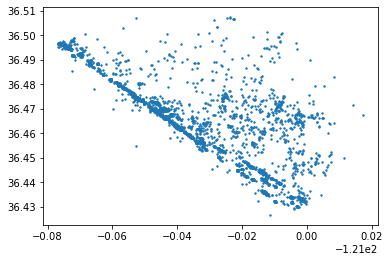

In [10]:
plt.scatter(cat_NCADD_5km.LON,cat_NCADD_5km.LAT,s=2)

In [11]:
cat_NCADD_missing_trim = cat_NCADD_5km[cat_NCADD_5km.ID.isin(missing_ev)]
print(len(cat_NCADD_missing_trim))


1


In [12]:
cat_NCADD_5km.columns = ['az', 'day', 'depth_km', 'EH1', 'EH2', 'EZ', 'hour', 'id', 'lat', 'long',
       'magnitude', 'minute', 'month', 'second', 'year']


In [13]:
        


cat_NCADD_5km['event_ID'] = [str(s)[0:-2] for s in cat_NCADD_5km['id']]
cat_NCADD_5km_2019 = cat_NCADD_5km[cat_NCADD_5km.year<2020]

cat_NCADD_5km_2019['event_ID'] .iloc[0]

'830'

In [14]:
# cat_NCADD_5km_2019.to_csv('../data/catalogs/NCADDiff_5km_2019.csv')

# Get on fault seismicity

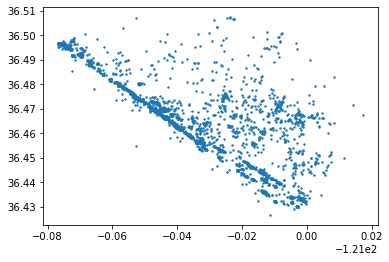

In [15]:
plt.scatter(cat_NCADD_5km_2019.long,cat_NCADD_5km_2019.lat,s=2)

In [16]:
def addRID(cat,cat_rep_2014_df):
    RID_list = []
    count= 0
    for i, row in cat.iterrows():

        evID = str(row.event_ID)    
        if evID in list(cat_rep_2014_df.event_ID):

            count+=1
            df_ev = cat_rep_2014_df[cat_rep_2014_df.event_ID==evID]

            RID_list.append(df_ev.RID[0])    

        else:
            RID_list.append('0')    

    print(count)    


    cat['RID'] = RID_list
    
    return cat

In [17]:
cat_rep_2014_df = formatWS2021('../data/catalogs/NCA_REPQcat_20210919_noMeta_v2.csv')
cat_NCADD_5km_2019 = addRID(cat_NCADD_5km_2019,cat_rep_2014_df)


27674 repeater earthquakes in 7714  sequences
1080


/Users/theresasawi/opt/anaconda3/envs/seismo2/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
cat_rep_2014_df

,RID,event_ID,isAnyRepeater,YR,MO,DY,HR,MN,SC,DAYS,...,lat,long,depth_km,magnitude,dmag,dmage,dX,dY,dZ,timestamp
timestamp_index,,,,,,,,,,,,,,,,,,,,,
1984-01-05 19:01:06.840,R9.357.0,1109581,1,1984,1,5.0,19.0,1.0,6.84,5.0,...,37.36694,-121.73225,5.811,3.30,3.30,NaN,20.3,17.9,48.2,1984-01-05 19:01:06.840
1984-01-14 00:42:22.150,R9.1.0,1801,1,1984,1,14.0,0.0,42.0,22.15,14.0,...,37.40796,-118.52611,13.171,3.80,3.80,NaN,109.8,56.4,110.4,1984-01-14 00:42:22.150
1984-01-14 03:11:13.720,R9.1.0,1810,1,1984,1,14.0,3.0,11.0,13.72,14.0,...,37.40794,-118.52239,13.259,4.00,4.00,NaN,109.8,56.4,110.4,1984-01-14 03:11:13.720
1984-01-15 10:14:21.610,R9.310.0,1968,1,1984,1,15.0,10.0,14.0,21.61,15.0,...,37.16255,-121.56488,1.953,2.79,2.79,NaN,26.2,22.7,25.0,1984-01-15 10:14:21.610
1984-01-18 00:17:00.010,R9.2.0,2302,1,1984,1,18.0,0.0,17.0,0.01,18.0,...,36.86239,-121.60089,7.628,2.88,2.88,NaN,21.0,19.0,39.0,1984-01-18 00:17:00.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-29 17:59:03.640,R0.0007.7791.0,72372296,1,2014,12,29.0,17.0,59.0,3.64,11321.0,...,36.56274,-121.16365,6.651,0.69,0.75,0.01,1.5,1.3,2.5,2014-12-29 17:59:03.640
2014-12-30 08:05:30.800,R2.0065.726.0,72372591,1,2014,12,30.0,8.0,5.0,30.80,11322.0,...,35.85534,-120.39902,4.379,2.07,2.17,0.01,3.2,2.6,4.8,2014-12-30 08:05:30.800
2014-12-30 22:30:23.270,R2.3267.673.0,72372851,1,2014,12,30.0,22.0,30.0,23.27,11322.0,...,36.44515,-121.01175,0.143,2.02,2.00,0.02,2.9,2.5,2.8,2014-12-30 22:30:23.270


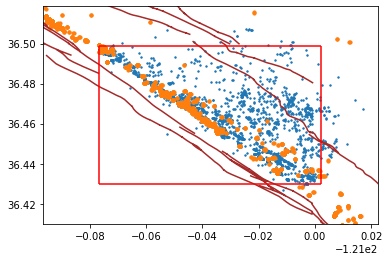

In [19]:
buff=.02
# plotScatterMap(cat_NCADD_5km_2019)
plt.scatter(cat_NCADD_5km_2019.long,cat_NCADD_5km_2019.lat,s=2)
plt.scatter(cat_rep_2014_df.long,cat_rep_2014_df.lat, s =10)
ax1 = plt.gca()
ax1.plot(fault_df.lon,fault_df.lat,color='brown')
plt.xlim(minlon-buff,maxlon+buff)
plt.ylim(minlat-buff,maxlat+buff)

ax1.vlines([minlon, maxlon], minlat,maxlat, linestyles='solid', colors='red')
ax1.hlines([minlat, maxlat], minlon,maxlon, linestyles='solid', colors='red',label='Our study area')


src/notebook_functions.py:4431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['dist_along_strike_km'] = rotateMapView(cat,angle,lat0,lon0)
src/notebook_functions.py:4435: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['radius'] = radii


Text(0, 0.5, 'Depth (km)')

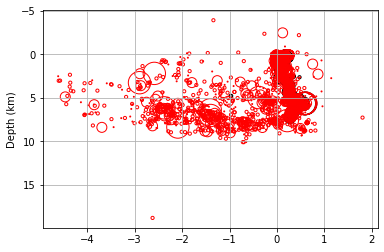

In [20]:
cat_NCADD_5km_2019_1 = plotScatterMapDepthAlongStrike( cat_NCADD_5km_2019,
                                lat0,
                                lon0,
                                angle=48+180,
                                scale=0.01,
                                ax=None)
ax = plt.gca()
ax.set_ylabel('Depth (km)')
# ax.invert_yaxis()

In [21]:
cat_NCADD_5km_2019_1.columns

Index(['az', 'day', 'depth_km', 'EH1', 'EH2', 'EZ', 'hour', 'id', 'lat',
       'long', 'magnitude', 'minute', 'month', 'second', 'year', 'event_ID',
       'RID', 'dist_along_strike_km', 'radius'],
      dtype='object')

In [22]:

cat_NCADD_5km_2019_2 = cat_NCADD_5km_2019_1[np.abs(cat_NCADD_5km_2019_1.dist_along_strike_km)<.5]

src/notebook_functions.py:4431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['dist_along_strike_km'] = rotateMapView(cat,angle,lat0,lon0)
src/notebook_functions.py:4435: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['radius'] = radii


Text(0, 0.5, 'Depth (km)')

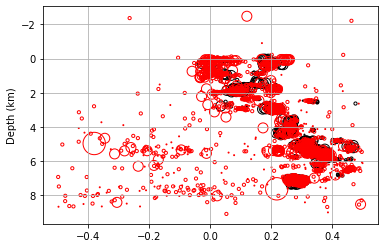

In [23]:
plotScatterMapDepthAlongStrike( cat_NCADD_5km_2019_2,
                                lat0,
                                lon0,
                                angle=180+48,
                                scale=0.01,
                                ax=None);
ax = plt.gca()
ax.set_ylabel('Depth (km)')
# ax.invert_yaxis()

/Users/theresasawi/opt/anaconda3/envs/seismo2/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


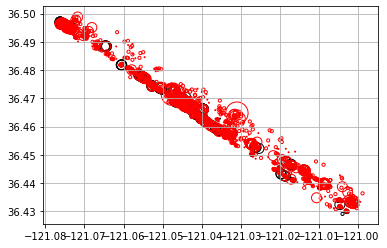

In [24]:
plotScatterMap(cat_NCADD_5km_2019_2)

In [25]:
len(cat_NCADD_5km_2019_2[cat_NCADD_5km_2019_2.RID!='0'])

1024

In [26]:
len(np.unique(cat_NCADD_5km_2019_2.RID))

145

src/notebook_functions.py:4431: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['dist_along_strike_km'] = rotateMapView(cat,angle,lat0,lon0)
src/notebook_functions.py:4435: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['radius'] = radii


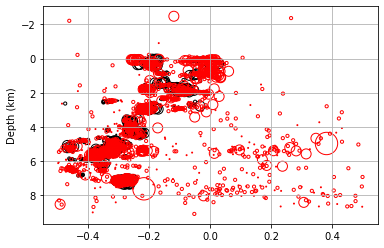

In [27]:
ax = plt.gca()
ax.set_ylabel('Depth (km)')

# plotScatterMapDepthAlongStrike( cat_orig_raw,
#                                 lat0,
#                                 lon0,
#                                 angle=48,
#                                 scale=0.01,
#                                 ax=ax);

# plotScatterMapDepthAlongStrike( cat_orig_raw,
#                                 lat0,
#                                 lon0,
#                                 angle=48,
#                                 scale=0.01,
#                                 ax=ax);

plotScatterMapDepthAlongStrike( cat_NCADD_5km_2019_2,
                                lat0,
                                lon0,
                                angle=48,
                                scale=0.01,
                                ax=None);

# ax.invert_yaxis()


# REQS WS2021 catalog

In [28]:
# cat_REQCA = formatWS2021('../data/catalogs/NCA_REPQcat_20210919_noMeta_v2.csv');


In [29]:
catRep_all = pd.read_csv('../data/catalogs/NCA_REPQcat_20210919_noMeta_v2.csv')    


In [30]:
catRep_all.columns

Index(['YR', 'MO', 'DY', 'HR', 'MN', 'SC', 'DAYS', 'LAT', 'LON', 'DEP', 'EX',
       'EY', 'EZ', 'MAG', 'DMAG', 'DMAGE', 'CCm', 'evID'],
      dtype='object')

In [31]:

catRep_all['REQS_ID'] = catRep_all['DMAG']

## Get IDS from full REQS cat

s = 0
REQS_IDs = []
REQS_evIDs = []
isAnyRepeater_list = []

allRep_evID = []

for i, row in enumerate(catRep_all.YR): #YR column has # which indicates new cluster sequence

    if i==0:
        RID = catRep_all.DMAG.iloc[i]

    if '#' in row:
        RID = catRep_all.DMAG.iloc[i]

        s += 1
        #save Rpeeater Sequence ID
        if i%500==0:
            print(RID)
    else:  
        ev  = catRep_all.iloc[i].evID #save event ID

        allRep_evID.append(str(int(ev)))
        REQS_evIDs.append(RID)
        isAnyRepeater_list.append(1)


# from paper : " 27,675 repeating earthquakes grouped in 7,713 sequences"


cat_rep_2014_df0 = pd.DataFrame({'RID':REQS_evIDs,
                              'index':allRep_evID,
                              'event_ID':allRep_evID,
                                'isAnyRepeater':isAnyRepeater_list})

cat_rep_2014_df0 = cat_rep_2014_df0.set_index('index')


cat_rep_2014_df0['event_ID'] = [str(evv) for evv in cat_rep_2014_df0.event_ID]


catRep_all['year'] = catRep_all['YR']
catRep_all['month'] = catRep_all['MO']
catRep_all['day'] = catRep_all['DY']
catRep_all['hour'] = catRep_all['HR']
catRep_all['minute'] = catRep_all['MN']
catRep_all['second'] = catRep_all['SC']
catRep_all['event_ID'] = [str(ev)[:-2] for ev in catRep_all['evID']]
catRep_all['lat'] = catRep_all['LAT']
catRep_all['long'] = catRep_all['LON']
catRep_all['depth_km'] = catRep_all['DEP']
catRep_all['magnitude'] = catRep_all['MAG']
catRep_all['dmag'] = catRep_all['DMAG']
catRep_all['dmage'] = catRep_all['DMAGE']
catRep_all['dX'] = catRep_all['EX']
catRep_all['dY'] = catRep_all['EY']
catRep_all['dZ'] = catRep_all['EZ']

# reorganize catalog so no more rows with #RID
cat_rep_2014_df = cat_rep_2014_df0.merge(catRep_all,on='event_ID',how='left')

cat_rep_2014_df['timestamp'] = pd.to_datetime(cat_rep_2014_df[['year','month','day','hour','minute','second']])

cat_rep_2014_df['timestamp_index'] = pd.to_datetime(cat_rep_2014_df[['year','month','day','hour','minute','second']])
cat_rep_2014_df = cat_rep_2014_df.set_index('timestamp_index')

cat_rep_2014_df.sort_index(inplace=True)



print(len(cat_rep_2014_df), 'repeater earthquakes in', s+1, ' sequences')



R0.0005.184.0
R0.0119.10026.0
R0.0456.11485.0
R1.0064.2407.0.C
R1.1594.4550.0
R1.2922.11911.0.C
R1.3157.11414.0
R1.3342.11057.0
R1.5275.6853.0
R1.5502.6313.0
R1.6137.4387.0
R2.2801.4331.0
R3.2194.1
R9.1.0
27674 repeater earthquakes in 7714  sequences


# Change location and magnitude columns to WS21 values

In [32]:
merged = cat_NCADD_5km_2019_2.merge(cat_rep_2014_df, on='event_ID',suffixes=['','_y'])

cat_NCADD_5km_2019_2.loc[cat_NCADD_5km_2019_2.event_ID.isin(merged.event_ID), ['lat', 'long', 'depth_km', 'EH1', 'EH2', 'EZ', 'magnitude']] = merged[['lat_y', 'long_y', 'depth_km_y', 'EX', 'EY', 'EZ', 'magnitude_y']].values

cat_NCADD_5km_2019_2.rename({'EH1':'dX',
                             'EH2':'dY',
                             'EZ':'dZ'}, axis=1, inplace=True)



/Users/theresasawi/opt/anaconda3/envs/seismo2/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/Users/theresasawi/opt/anaconda3/envs/seismo2/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
cat_NCADD_5km_2019_2.columns

Index(['az', 'day', 'depth_km', 'dX', 'dY', 'dZ', 'hour', 'id', 'lat', 'long',
       'magnitude', 'minute', 'month', 'second', 'year', 'event_ID', 'RID',
       'dist_along_strike_km', 'radius'],
      dtype='object')

# SAVE FINAL CATALOG!!!

In [42]:
cat_NCADD_5km_2019_2.to_csv('../data/catalogs/NCADDiff_5km_2019_500mFault_WS21.csv')

In [35]:
cat_NCADD_5km_2019_2.magnitude

225       2.1
301       0.0
882       0.8
1220      1.2
1431      0.7
         ... 
819825    0.9
820066    0.8
820081    1.8
820120    0.7
820145    2.4
Name: magnitude, Length: 3968, dtype: float64

In [36]:
cat_rep_2014_df.event_ID

timestamp_index
1984-01-05 19:01:06.840     1109581
1984-01-14 00:42:22.150        1801
1984-01-14 03:11:13.720        1810
1984-01-15 10:14:21.610        1968
1984-01-18 00:17:00.010        2302
                             ...   
2014-12-29 17:59:03.640    72372296
2014-12-30 08:05:30.800    72372591
2014-12-30 22:30:23.270    72372851
2014-12-31 16:33:46.900    72373096
2014-12-31 20:11:06.790    72373136
Name: event_ID, Length: 27674, dtype: object

In [37]:
cat_WS21 = cat_NCADD_5km_2019_2[cat_NCADD_5km_2019_2.event_ID.isin(list(cat_rep_2014_df.event_ID))]


In [38]:
cat_WS21.dZ

4108      0.010
5109      0.019
5469      0.012
5471      0.017
5490      0.019
          ...  
681731    0.068
682508    0.026
683207    0.026
684788    0.008
689365    0.010
Name: dZ, Length: 1024, dtype: float64

# Distance center array to Loma Prieta

In [39]:
haversine.haversine((lat0, lon0),(37.04, -121.88),unit='km') # Loma Prieta

98.63349587824575

In [40]:
haversine.haversine((lat0, lon0),(35.899722, -120.432778),unit='km') # Parkfield

83.01574009933996

In [41]:
haversine.haversine((lat0, lon0),(36.380278, -121.002778),unit='km')# BItterwater

9.905794229162524